In [158]:
# 0. imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dt
import itertools
import os
import statsmodels.api as sm
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,9)

In [99]:
# 1. data load
macro_monthly_file = "./data/macro_monthly_data.csv"
df_mm = pd.read_csv(macro_monthly_file)
df_mm.head(3)

,unemployment,CPI_inflation,industrial_production_YoY,month
0,13.2,4.1,8.5,01/01/2012
1,13.4,4.3,4.6,01/02/2012
2,13.3,3.9,0.9,01/03/2012


In [100]:
# 2. make a plot for unemployment
df_mm.index = pd.PeriodIndex([pd.Period(el, freq="M") for el in pd.to_datetime(df_mm.loc[:, "month"], format="%d/%m/%Y")])
df_mm.loc[:, "month"] = [pd.to_datetime(el, format="%d/%m/%Y") for el in df_mm.loc[:, "month"]]
df_mm.head(3)

,unemployment,CPI_inflation,industrial_production_YoY,month
2012-01,13.2,4.1,8.5,2012-01-01
2012-02,13.4,4.3,4.6,2012-02-01
2012-03,13.3,3.9,0.9,2012-03-01


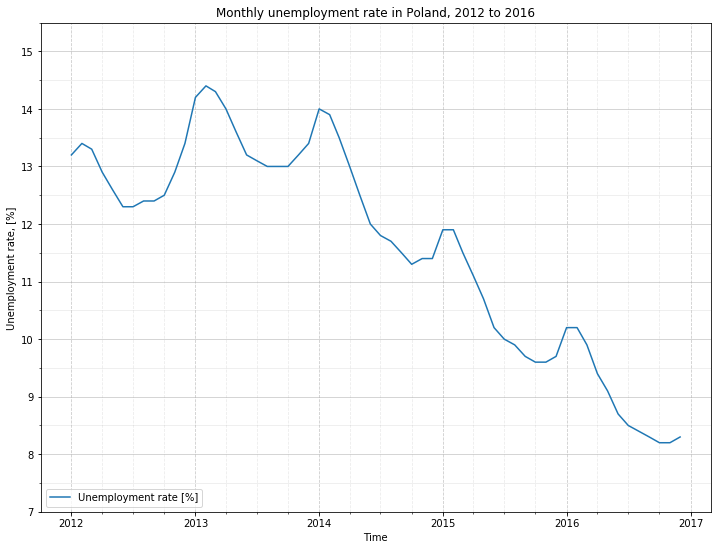

In [105]:
fig_unemp = plt.figure(1)
ax_unemp = fig_unemp.add_subplot(1,1,1)
# ax_joint.plot_date(x = df_mm.loc[:,"month"],
#                   y = df_mm.loc[:, ["unemployment", "CPI_inflation", "industrial_production_YoY"]],
#                   fmt="-")
ax_unemp.plot_date(x = df_mm.loc[:, "month"],
                  y = df_mm.loc[:, "unemployment"], fmt="-",
                  label="Unemployment rate [%]")
ax_unemp.legend(loc="lower left")
# format y axis
ax_unemp.set_yticks(np.arange(7,16,1), minor=False)
ax_unemp.set_yticks(np.arange(7,16,0.5), minor=True)
ax_unemp.yaxis.grid(True, which="major", alpha=0.5)
ax_unemp.yaxis.grid(True, which="minor", alpha=0.25)

# format x axis
ax_unemp.xaxis.set_major_locator(locator=dt.YearLocator(1))
ax_unemp.xaxis.set_minor_locator(dt.MonthLocator(bymonth=(1,4,7,10)))
ax_unemp.xaxis.grid(True, which="minor", alpha=0.25, linestyle="--")
ax_unemp.xaxis.grid(True, which="major", alpha=0.5, linestyle="--")

# add titles for the plot and axes
ax_unemp.set_xlabel("Time")
ax_unemp.set_ylabel("Unemployment rate, [%]")
ax_unemp.set_title("Monthly unemployment rate in Poland, 2012 to 2016")

In [156]:
# 3. do simple seasonal analysis on the unemployment rate time series
df_mm.head(4)
df_mm_sd = df_mm.loc[:, ["month", "unemployment"]]
df_mm_sd.loc[:, "month"] = pd.to_datetime(df_mm_sd.loc[:, "month"])
df_mm_sd_2 = df_mm_sd.set_index("month")
df_mm_sd_2.head(3)
res = sm.tsa.seasonal_decompose(df_mm_sd_2, model="additive", two_sided=False)

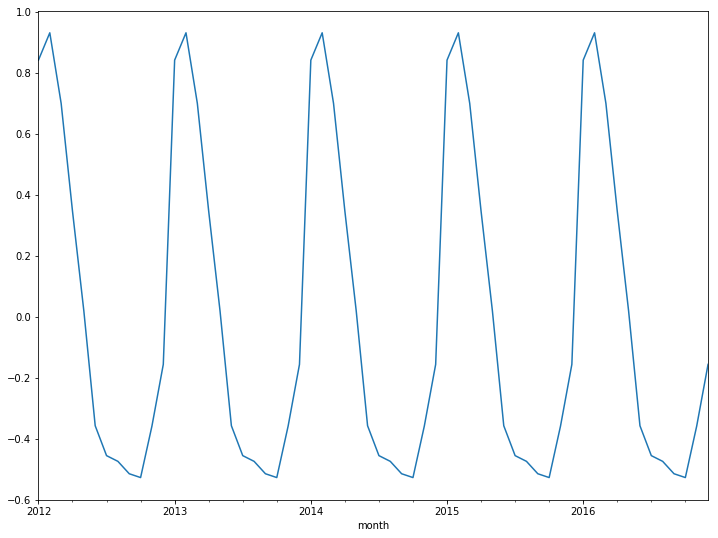

In [168]:
# plot seasonal component
fig_seasonal = plt.figure()
ax_seasonal = fig_seasonal.add_subplot(1,1,1)
res.seasonal.plot(ax=ax_seasonal)
ax_seasonal.legend_.remove()